In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
%matplotlib inline


In [2]:
df=pd.read_csv('clustering project.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## data Preprocessing

In [3]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

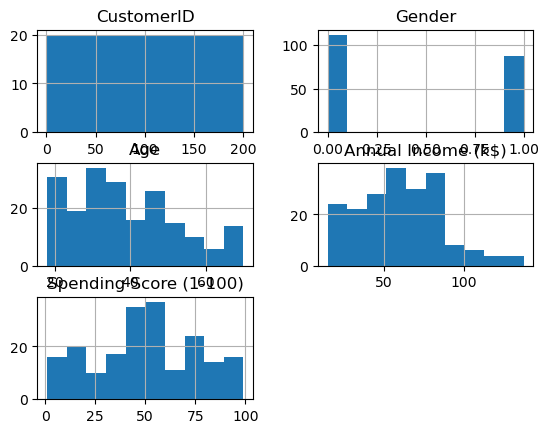

In [6]:
df.hist()

### check for nan

In [7]:
print (f'Shape of dataset before cleaning:  {df.shape}')
df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]=df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].apply(pd.to_numeric,errors ='coerce')
df=df.dropna()
df=df.reset_index(drop=True)
print (f'Shape of dataset after cleaning:  {df.shape}')
df.isna().any()

Shape of dataset before cleaning:  (200, 5)
Shape of dataset after cleaning:  (200, 5)


CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

### StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler
# we dont need CustomerID
X=df.values[:,1:]
X=np.nan_to_num(X)
scaler = StandardScaler().fit(X)
X=scaler.transform(X)

## 1_k means

In [10]:
from sklearn.cluster import KMeans 
num_clusters=5
k_means = KMeans(n_clusters=num_clusters, random_state=0, n_init=12)
k_means = k_means.fit(X)
labels=k_means.labels_
print(labels)

[1 1 4 2 4 2 4 2 3 2 3 2 4 2 3 1 4 1 3 2 3 1 4 1 4 1 4 1 4 2 3 2 3 1 4 2 4
 2 4 2 4 1 3 2 4 2 4 2 2 2 4 1 2 3 4 3 4 3 2 3 3 1 4 4 3 1 4 4 1 2 3 4 4 4
 3 1 4 3 2 4 3 1 3 4 2 3 4 2 2 4 4 1 3 4 2 1 4 2 3 1 2 4 3 1 3 2 4 3 3 3 3
 2 4 1 2 2 4 4 4 4 1 4 2 1 2 2 3 1 3 1 0 1 2 2 0 2 0 1 0 2 0 1 2 2 0 1 3 2
 0 1 0 1 0 2 0 2 0 2 0 2 4 2 0 2 0 2 0 2 0 1 0 1 0 1 0 2 0 1 0 1 0 2 0 2 0
 1 0 1 0 2 0 2 0 2 0 2 0 1 0 1]


c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## elbow method to reconize best num cluster

c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

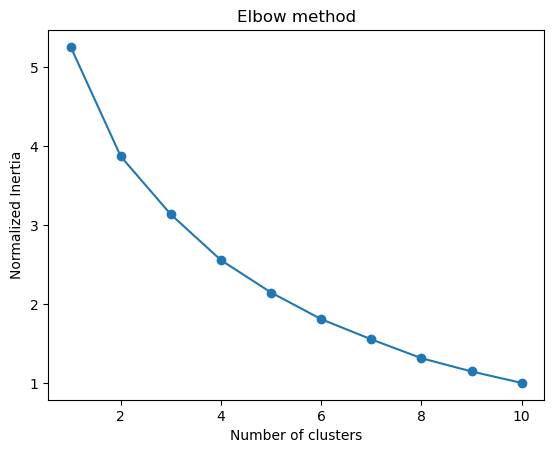

In [11]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

inertias_normalized = [inertia / inertias[-1] for inertia in inertias]
plt.plot(range(1, 11), inertias_normalized, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Normalized Inertia')
plt.show()


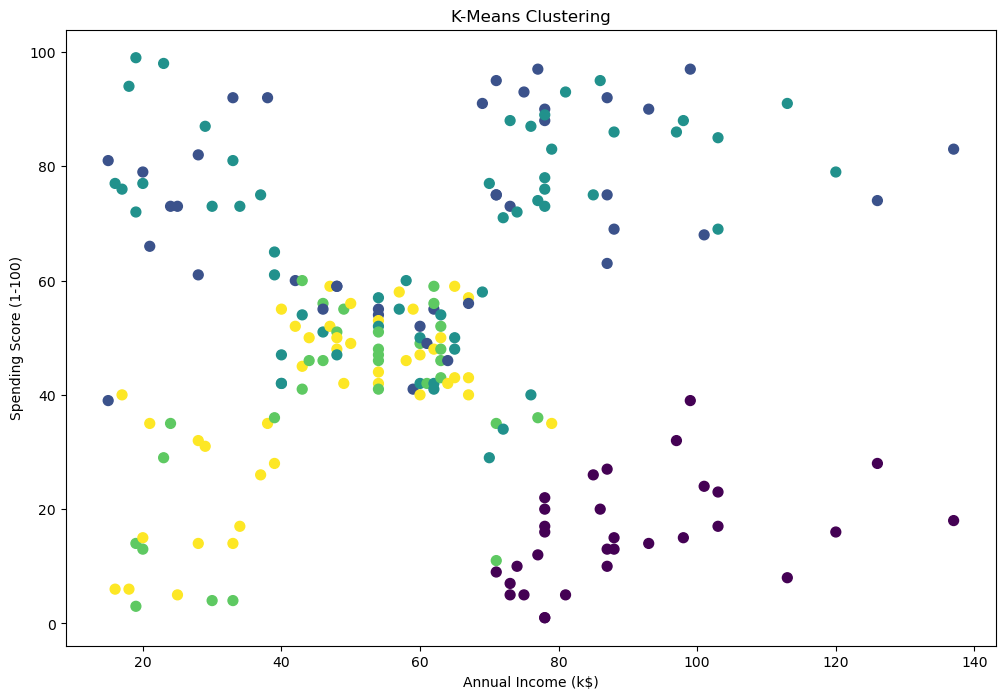

In [12]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## cluster_centers

In [13]:
k_means_cluster_centers=k_means.cluster_centers_
k_means_cluster_centers

array([[ 0.21835203,  0.1126274 ,  1.12370799, -1.33771584],
       [ 1.12815215, -0.76072691,  0.05496398,  0.83369302],
       [-0.88640526, -0.75047453, -0.00501655,  0.6979562 ],
       [ 1.12815215,  1.22385356, -0.4498575 , -0.44231533],
       [-0.88640526,  0.73868428, -0.54302375, -0.41076909]])

In [14]:
df_kmeans=df
df_kmeans['clus_label_kmeans']=labels
df_kmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clus_label_kmeans
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


In [15]:
df_kmeans.groupby('clus_label_kmeans').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
clus_label_kmeans,,,,,
0,167.451613,0.548387,40.419355,90.000000,15.741935
1,103.375000,1.000000,28.250000,62.000000,71.675000
2,101.910714,0.000000,28.392857,60.428571,68.178571
3,72.612903,1.000000,55.903226,48.774194,38.806452
4,67.047619,0.000000,49.142857,46.333333,39.619048


## visualize plot k means 

In [16]:
import plotly.express as px
fig = px.scatter_3d(df, x='Annual Income (k$)', y='Age', z='Spending Score (1-100)', color=labels)
fig.update_traces(marker=dict(size=2))
fig.show()

# 2_hierarchy
##  distance matrix

In [17]:
import scipy.spatial
dist_matrix = np.array([np.linalg.norm(X[i] - X[j]) for i in range(X.shape[0]) for j in range(X.shape[0])]).reshape(
    X.shape[0], X.shape[0])

## hierarchy average methode

In [18]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage

condensed_dist_matrix = squareform(dist_matrix)
Z_using_dist_matrix = linkage(condensed_dist_matrix, 'average')
Z_using_dist_matrix

array([[6.50000000e+01, 6.80000000e+01, 7.17666897e-02, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 7.17666897e-02, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 9.00803899e-02, 2.00000000e+00],
       [1.14000000e+02, 1.15000000e+02, 1.05730374e-01, 2.00000000e+00],
       [6.00000000e+01, 7.00000000e+01, 1.20910138e-01, 2.00000000e+00],
       [1.17000000e+02, 1.19000000e+02, 1.30409100e-01, 2.00000000e+00],
       [1.12000000e+02, 1.21000000e+02, 1.38349565e-01, 2.00000000e+00],
       [4.80000000e+01, 4.90000000e+01, 1.43533379e-01, 2.00000000e+00],
       [1.00000000e+02, 1.05000000e+02, 1.48690768e-01, 2.00000000e+00],
       [1.47000000e+02, 1.59000000e+02, 1.53511726e-01, 2.00000000e+00],
       [8.40000000e+01, 8.70000000e+01, 1.55855895e-01, 2.00000000e+00],
       [4.60000000e+01, 5.00000000e+01, 1.56659188e-01, 2.00000000e+00],
       [1.10000000e+01, 1.90000000e+01, 1.57536024e-01, 2.00000000e+00],
       [9.60000000e+01, 1.01000000e+02, 1.67142352e

## dendrogram

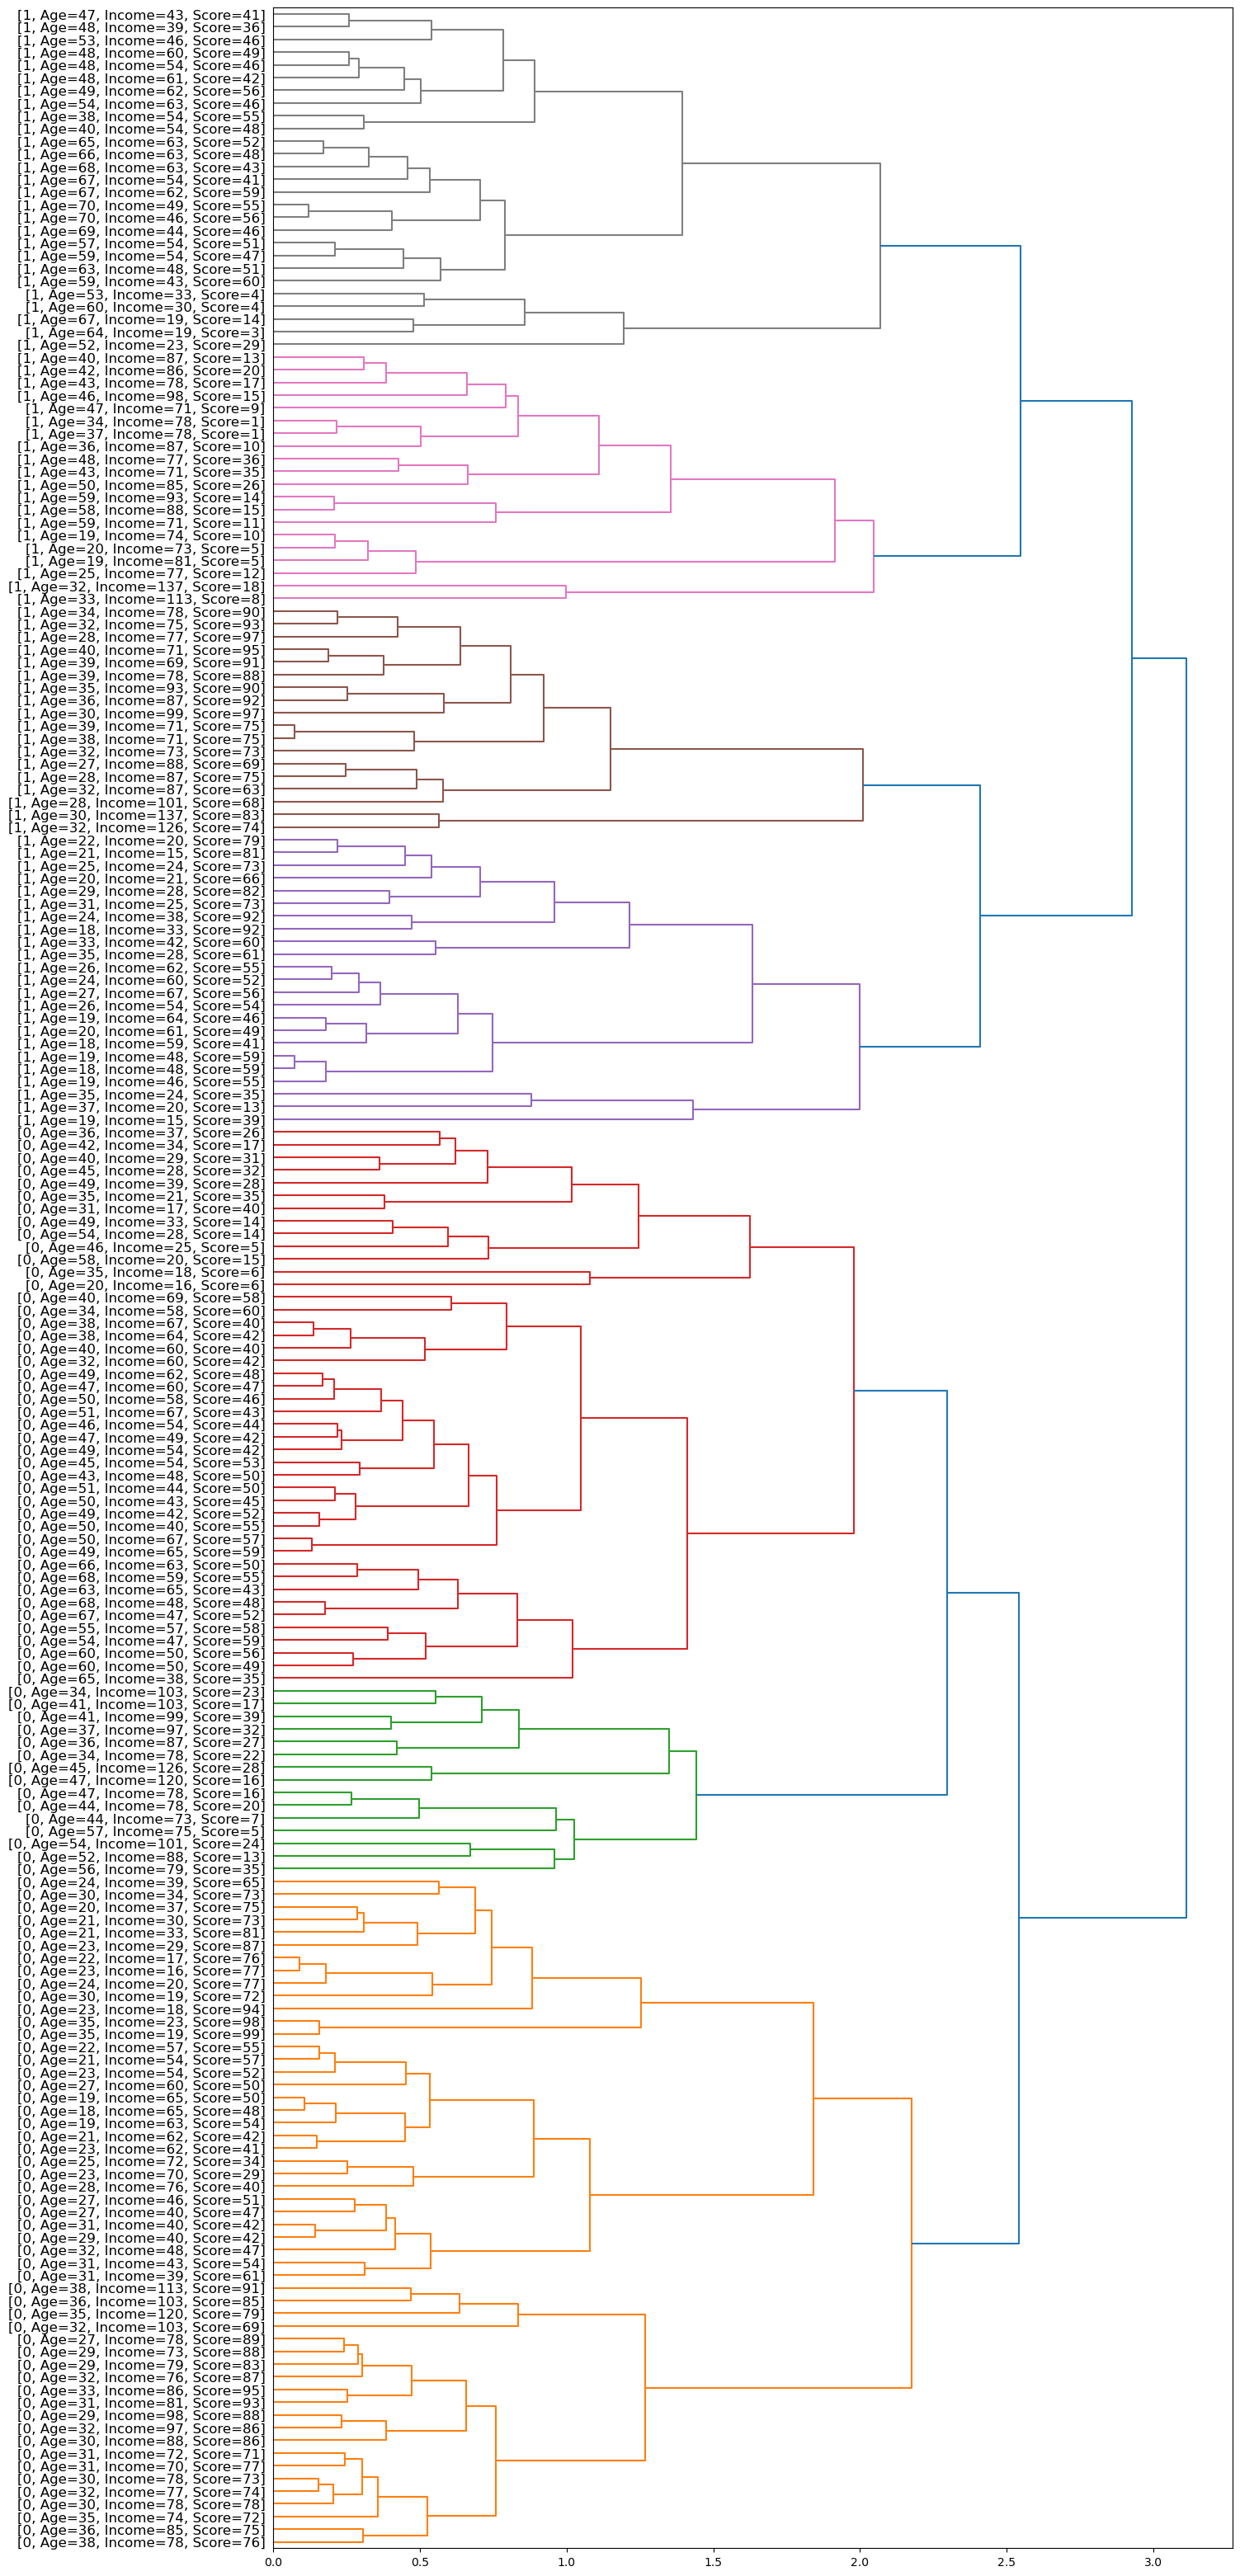

In [19]:
fig = plt.figure(figsize=(15, 40))
def ill(id):
    return f"[{df['Gender'][id]}, Age={df['Age'][id]}, Income={df['Annual Income (k$)'][id]}, Score={df['Spending Score (1-100)'][id]}]"
dendro = dendrogram(Z_using_dist_matrix, leaf_label_func=ill, leaf_rotation=0, leaf_font_size=12, orientation='right')


## cluster labels

In [20]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=8, linkage = 'average')
clustering.fit(dist_matrix)
clustering.labels_

c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_agglomerative.py:588: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



array([3, 3, 1, 6, 1, 6, 1, 6, 5, 6, 5, 6, 1, 6, 5, 3, 1, 3, 5, 6, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 6, 5, 6, 5, 3, 1, 6, 1, 4, 1, 6, 1, 3, 0, 4,
       1, 4, 1, 4, 4, 4, 1, 3, 4, 0, 1, 0, 1, 0, 4, 0, 0, 3, 1, 1, 0, 3,
       1, 1, 3, 4, 0, 1, 1, 1, 0, 3, 1, 0, 4, 1, 0, 0, 0, 1, 4, 0, 1, 4,
       4, 1, 1, 3, 0, 4, 4, 3, 1, 4, 0, 3, 4, 1, 0, 3, 0, 4, 1, 0, 0, 0,
       0, 4, 4, 3, 4, 4, 1, 1, 1, 1, 3, 4, 4, 3, 4, 4, 0, 3, 0, 3, 0, 3,
       4, 4, 0, 4, 1, 3, 0, 4, 1, 3, 4, 4, 0, 3, 0, 4, 1, 3, 0, 3, 1, 4,
       1, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 1, 3, 0, 3, 0, 3, 1, 4,
       0, 3, 0, 3, 1, 4, 0, 4, 1, 3, 1, 3, 1, 4, 1, 4, 2, 4, 2, 4, 2, 7,
       2, 7], dtype=int64)

In [21]:
df_hierarchy=df
df_hierarchy['cluster_hierarchy'] = clustering.labels_
df_hierarchy.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clus_label_kmeans,cluster_hierarchy
0,1,1,19,15,39,1,3
1,2,1,21,15,81,1,3
2,3,0,20,16,6,4,1
3,4,0,23,16,77,2,6
4,5,0,31,17,40,4,1


## visualize Clusters

Text(0, 0.5, 'Annual Income (k$)')

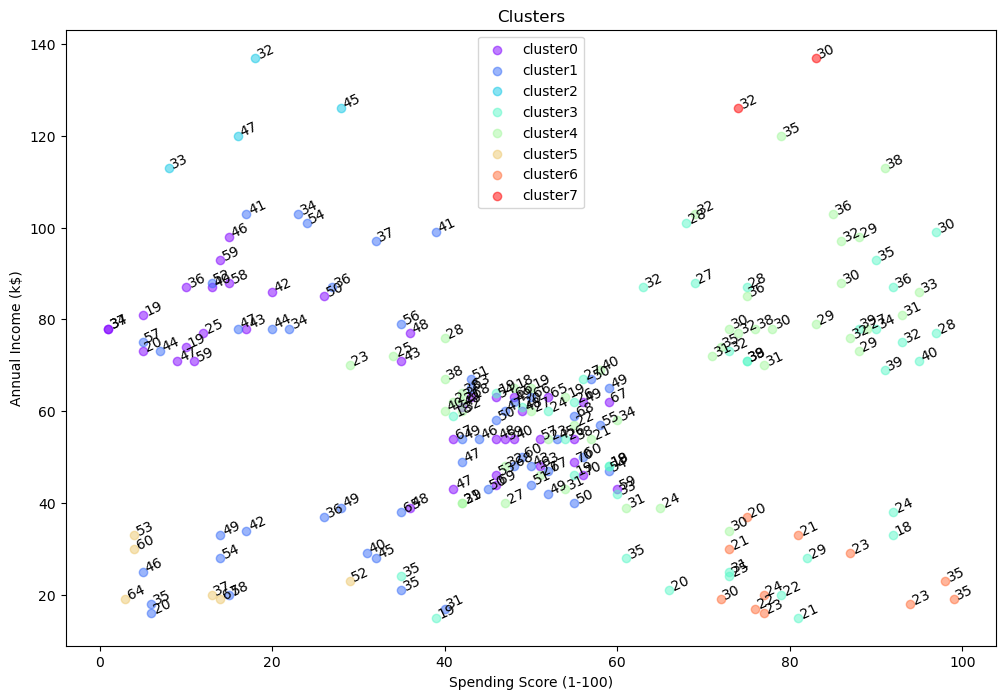

In [22]:
import matplotlib.cm as cm
n_clusters = max(clustering.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(12,8))

for color, label in zip(colors, cluster_labels):
    subset = df_hierarchy[df_hierarchy.cluster_hierarchy == label]
    for i in subset.index:
            plt.text(subset['Spending Score (1-100)'][i], subset['Annual Income (k$)'][i], str(subset['Age'][i]), rotation=25)
    plt.scatter(subset['Spending Score (1-100)'], subset['Annual Income (k$)'], color=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.Age, subset.Annual Income (k$))
plt.legend()
plt.title('Clusters')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

## group Clusters by gender

In [23]:
clus_gender = df_hierarchy.groupby(['cluster_hierarchy','Gender'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
clus_gender

Age  Annual Income (k$)  \
cluster_hierarchy Gender                                  
0                 1       49.450000           65.800000   
1                 0       48.411765           55.196078   
2                 0       46.000000          123.000000   
                  1       32.500000          125.000000   
3                 1       28.026316           57.552632   
4                 0       29.770833           69.041667   
5                 1       55.500000           24.000000   
6                 0       25.181818           23.727273   
7                 1       31.000000          131.500000   

                          Spending Score (1-100)  
cluster_hierarchy Gender                          
0                 1                    33.225000  
1                 0                    35.039216  
2                 0                    22.000000  
                  1                    13.000000  
3                 1                    70.789474  
4                 0                    63.145833  
5                 1                    11.166667  
6                 0                    82.636364  
7                 1                    78.500000

## visualize by cluster groups

C:\Users\AERO\AppData\Local\Temp\ipykernel_20096\1241844552.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Text(0, 0.5, 'Annual Income (k$)')

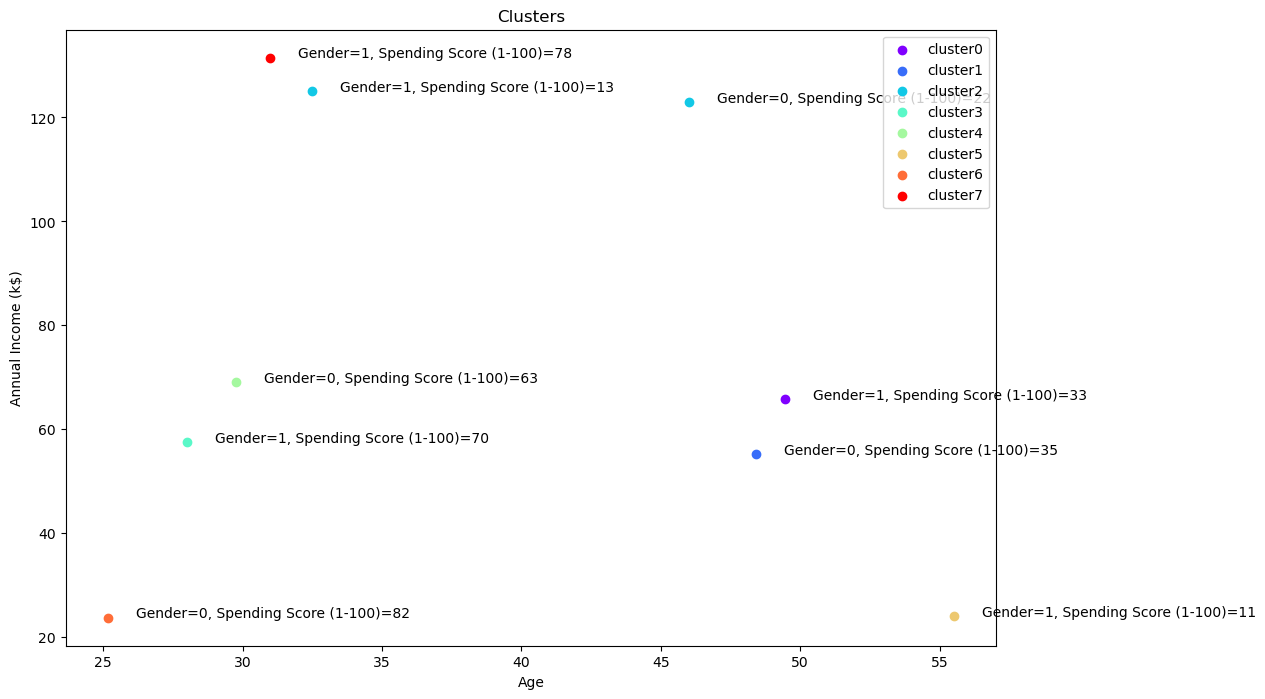

In [24]:
plt.figure(figsize=(12,8))
for color, label in zip(colors, cluster_labels):
    subset = clus_gender.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+1, subset.loc[i][1],'Gender='+str(int(i)) + ', Spending Score (1-100)='+str(int(subset.loc[i][2])))
    plt.scatter(subset['Age'], subset['Annual Income (k$)'], color=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# 3_dbscan

In [25]:
from sklearn.cluster import DBSCAN 
epsilon=0.8
minimumSamples=6
db_clustering= DBSCAN(eps=epsilon, min_samples=minimumSamples)
db_clustering=db_clustering.fit(X)
db_label=db_clustering.labels_
print(db_label)

[-1  1 -1  0 -1  0 -1  0 -1  0 -1 -1 -1  0 -1  1  0  1 -1 -1 -1  1  0  1
  0  1  0 -1  0  0 -1  0 -1  1  0  0  0  0  0  0  0  1  2  0  0  0  0  0
  0  0  0  3  0  2  0  2  0  2  0  2  2  3  0  0  2  3  0  0  3  0  2  0
  0  0  2  3  0  2  0  0  2  2  2  0  0  2  0  0  0  0  0  3  2  0  0  3
  0  0  2  3  0  0  2  3  2  0  0  2  2  2  2  0  0  3  0  0  0  0  0  0
  3  0  0  3  0  0  2  3 -1  3  4  3  0  0 -1  0  5  3 -1  0 -1  3  0  0
 -1  3  2  0  5  3  4  3  5  0  5  0  4  0  4  0  0  0 -1  0  4  0  4  0
  5  3  4  3  4  3  5  0  4  3 -1  3  5  0  4  0  5  3 -1 -1 -1  0  5  0
 -1  0 -1  0 -1 -1 -1 -1]


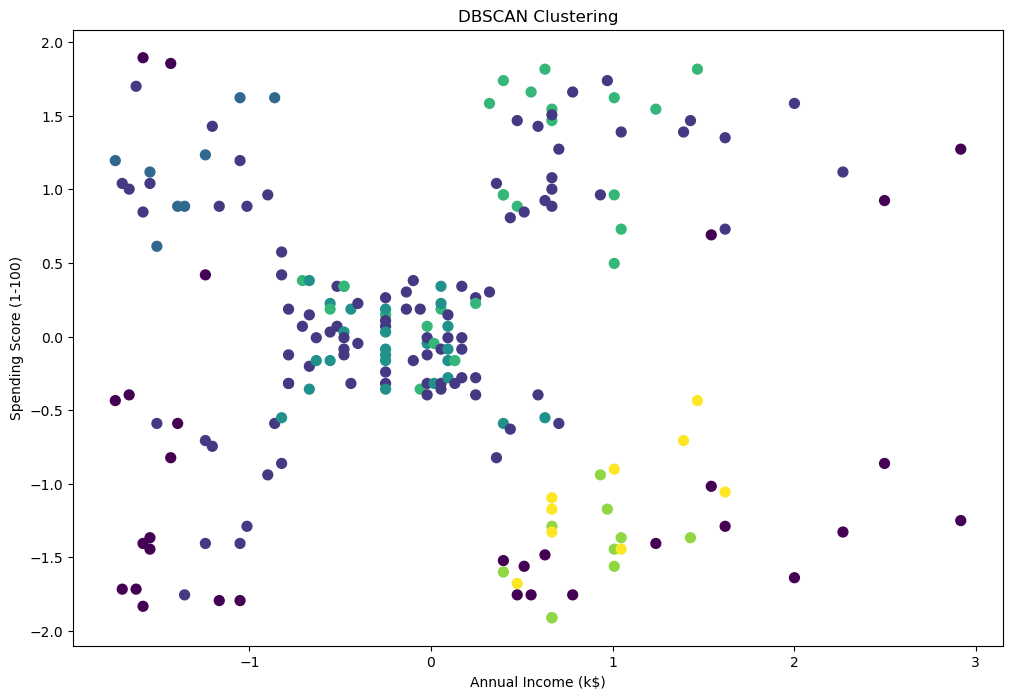

In [26]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 2], X[:, 3], c=db_label, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## masking our data and determine our outlier data

In [27]:
core_mask=np.zeros_like(db_label,dtype=bool)
core_mask[db_clustering.core_sample_indices_]= True
core_mask

array([False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,

## number of clusters

In [28]:
n_clusters = len(set(db_label)) - (1 if -1 in set(db_label) else 0)
n_clusters

6

In [29]:
uniqe_labels=set(db_label)
uniqe_labels

{-1, 0, 1, 2, 3, 4, 5}

## plot our data and outliers

In [30]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(uniqe_labels)))

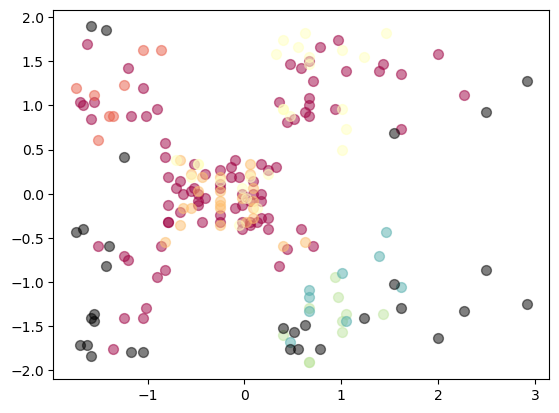

In [31]:
for k, col in zip(uniqe_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (db_label == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_mask]
    plt.scatter(xy[:, 2], xy[:, 3],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_mask]
    plt.scatter(xy[:, 2], xy[:, 3],s=50, c=[col], marker=u'o', alpha=0.5)

Based on the results from the three clustering methods, it appears that our data can be effectively organized into five clusters.

In [34]:
# ---------- Models ----------
models = {
    "KMeans": KMeans(n_clusters=4, random_state=42),
    "Hierarchical": AgglomerativeClustering(n_clusters=4),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5)
}

# ---------- Store results ----------
results = []

for name, model in models.items():
    labels = model.fit_predict(X)

    # Skip metrics if clustering produces only 1 cluster or all noise
    if len(set(labels)) > 1 and len(set(labels)) != 1:
        sil_score = silhouette_score(X, labels)
        ch_score = calinski_harabasz_score(X, labels)
        db_score = davies_bouldin_score(X, labels)
    else:
        sil_score, ch_score, db_score = np.nan, np.nan, np.nan

    results.append({
        "Model": name,
        "Silhouette Score": sil_score,
        "Calinski-Harabasz Score": ch_score,
        "Davies-Bouldin Score": db_score
    })

# ---------- Create comparison table ----------
results_df = pd.DataFrame(results)
print(results_df)

          Model  Silhouette Score  Calinski-Harabasz Score  \
0        KMeans          0.290109                66.856126   
1  Hierarchical          0.263226                60.306160   
2        DBSCAN          0.012015                12.099397   

   Davies-Bouldin Score  
0              1.305563  
1              1.401991  
2              1.389441  


c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

